In [1]:
header = ['date','year','doy','dor','Tave','Tmax','Tmin','P']

In [15]:
data = pd.read_table('./data/jemez_raws/jemez_raws_wy2002_2015.txt', delim_whitespace=True, skiprows=6, names=header)
data.index = pd.DatetimeIndex(data.date)

data.loc[data.Tave==-9999,'Tave'] = np.NaN
data.loc[data.Tmin==-9999,'Tmin'] = np.NaN
data.loc[data.Tmax==-9999,'Tmax'] = np.NaN
data.loc[data.P==-9999,'P'] = np.NaN
data.loc[data.P>1000,'P'] = np.NaN

In [16]:
data.head()

,date,year,doy,dor,Tave,Tmax,Tmin,P
2002-10-01,10/01/2002,2002,274,1,10.4,17.2,5.6,2.29
2002-10-02,10/02/2002,2002,275,2,10.8,17.2,4.4,2.03
2002-10-03,10/03/2002,2002,276,3,5.6,10.0,0.6,0.00
2002-10-04,10/04/2002,2002,277,4,5.5,14.4,-3.9,0.00
2002-10-05,10/05/2002,2002,278,5,8.8,17.2,0.0,0.00


In [17]:
data.tail()

,date,year,doy,dor,Tave,Tmax,Tmin,P
2015-09-26,09/26/2015,2015,269,4744,16.6,26.7,7.8,0
2015-09-27,09/27/2015,2015,270,4745,17.2,26.7,8.3,0
2015-09-28,09/28/2015,2015,271,4746,17.3,25.6,10.0,0
2015-09-29,09/29/2015,2015,272,4747,17.4,24.4,9.4,0
2015-09-30,09/30/2015,2015,273,4748,16.0,25.0,8.9,0


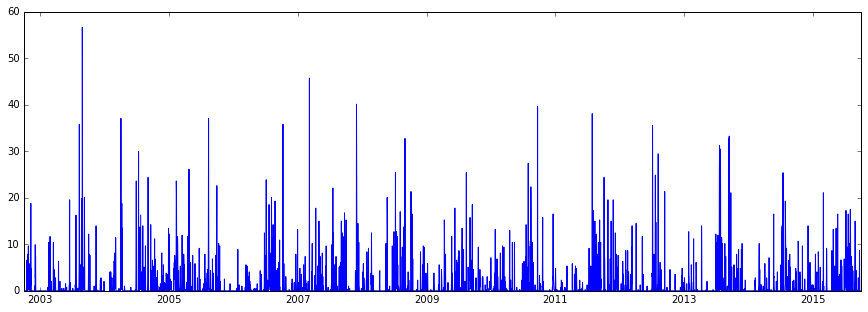

In [18]:
plt.figure(figsize=(15,5))
plt.plot(data.index,data.P)

In [23]:
data.loc[np.isnan(data.P),'P'] = 0

In [25]:
data.Tave.interpolate(inplace=True)
data.Tmin.interpolate(inplace=True)
data.Tmax.interpolate(inplace=True)

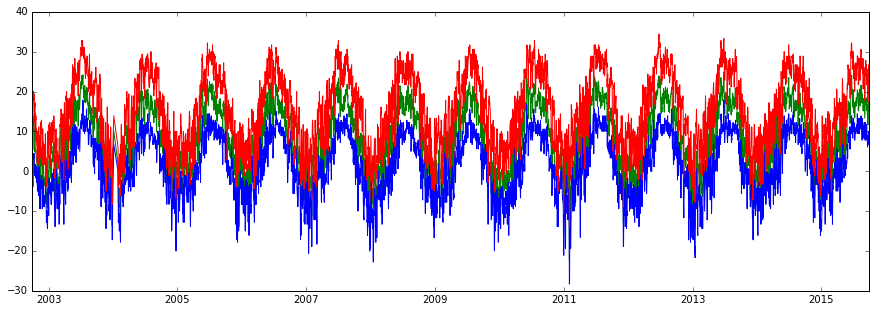

In [26]:
plt.figure(figsize=(15,5))
plt.plot(data.index,data.Tave,'-g')
plt.plot(data.index,data.Tmin,'-b')
plt.plot(data.index,data.Tmax,'-r')

In [27]:
data.to_pickle('./data/Jemez_raws_wy2003_2015.pcl')